In [1]:
# need to install networkx, stemming
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import string
import numpy as np
from stemming.porter2 import stem
from scipy.linalg import *
from collections import OrderedDict

In [16]:
# read file and save as a list
sentences = []
with open('julius caesar sentences.txt', 'rb') as f:
    for line in f:
        if line.strip() != '':
            sentences.append(line.strip())
f.close()

In [3]:
# remove punctuations
for i in range(len(sentences)):
    for c in string.punctuation:
        sentences[i]= sentences[i].replace(c,"")

In [5]:
# generate lexicon of stem words and their freq
lexicon = {}
word_counter=0
for line in sentences:
    word = line.split()
    for item in word:
        lexicon[stem(item)] = word_counter
    word_counter += 1
    
lexicon = OrderedDict(lexicon)

In [6]:
# compute sparse matrix
S = np.zeros(len(sentences) * len(lexicon), dtype=np.dtype('Float64')).reshape(len(sentences), len(lexicon))
for i in range(len(sentences)):
    for w in [stem(word) for word in sentences[i].split()]:
        S[i, lexicon.keys().index(w)] = 1

In [7]:
S.shape

(1459, 2346)

In [8]:
# compute numerator of the cosine similarity
P = np.dot(S, S.transpose())

In [9]:
#zero out the diagonal elements
P -= np.diag(np.diag(P))

In [10]:
#denominator of the cosine similarity
D = np.array([norm(x) for x in S])
DD = np.dot(D, D.transpose())
# the cosine similarity
P = np.divide(P, DD)

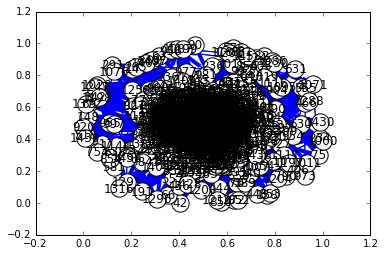

In [11]:
# generate graph
G = nx.DiGraph(np.nan_to_num(P)) 
# plot network
pos=nx.spring_layout(G) 
nx.draw_networkx_nodes(G,pos,node_size=300, node_color='w') 
nx.draw_networkx_edges(G,pos,edge_color='b')
nx.draw_networkx_labels(G,pos)
plt.show()

In [12]:
# run pagerank 
pagerank = nx.pagerank(G)
pagerank

{0: 0.0011593340607814852,
 1: 0.0003883206268238456,
 2: 0.00011004590782083735,
 3: 0.00022505938512640362,
 4: 0.00010293007616825763,
 5: 0.00036131777727640003,
 6: 0.00022344751697615876,
 7: 0.0006556932121024749,
 8: 0.0003555193937024971,
 9: 0.00032661279915721257,
 10: 0.00038726805554550094,
 11: 0.00034866717807165095,
 12: 0.0005968522484751605,
 13: 0.00012915133952487874,
 14: 0.00012051765415929548,
 15: 0.00039397584088607135,
 16: 0.0005908836314179803,
 17: 0.00018741051089513387,
 18: 0.0010964623979108272,
 19: 0.00030170446027534965,
 20: 0.0002915756978589393,
 21: 0.0005083526032142114,
 22: 0.0004066624541685874,
 23: 0.00041900789097191744,
 24: 0.0008870057100753499,
 25: 0.000344224672636179,
 26: 0.00021321641049946717,
 27: 0.0008082452533218203,
 28: 0.0002592210159344727,
 29: 0.0002592210159344728,
 30: 0.0007762903756348446,
 31: 0.0004231348800534822,
 32: 0.00026732978631196174,
 33: 0.0003382398543484164,
 34: 0.0002918737545573128,
 35: 0.00097095

In [13]:
# every node's importance
order = sorted(pagerank, key=pagerank.get, reverse=True)

[862,
 835,
 712,
 623,
 413,
 807,
 659,
 423,
 215,
 105,
 948,
 266,
 705,
 676,
 369,
 387,
 117,
 380,
 47,
 1276,
 812,
 154,
 122,
 674,
 381,
 672,
 1223,
 751,
 281,
 139,
 311,
 247,
 571,
 146,
 504,
 1049,
 951,
 393,
 176,
 97,
 1037,
 259,
 1133,
 227,
 988,
 116,
 497,
 243,
 174,
 716,
 1224,
 993,
 782,
 1003,
 622,
 1051,
 1415,
 1453,
 375,
 701,
 806,
 1443,
 492,
 104,
 1024,
 113,
 460,
 382,
 384,
 1131,
 95,
 684,
 700,
 950,
 248,
 905,
 1269,
 734,
 1344,
 681,
 365,
 1225,
 505,
 138,
 195,
 836,
 1245,
 489,
 785,
 306,
 508,
 953,
 366,
 286,
 1454,
 430,
 679,
 792,
 823,
 433,
 861,
 1304,
 677,
 763,
 394,
 302,
 334,
 697,
 132,
 721,
 252,
 163,
 182,
 253,
 403,
 102,
 491,
 544,
 1137,
 417,
 615,
 696,
 189,
 691,
 426,
 422,
 1036,
 943,
 1432,
 53,
 1382,
 153,
 727,
 752,
 735,
 665,
 946,
 1022,
 246,
 250,
 965,
 1136,
 1393,
 313,
 128,
 386,
 1323,
 1053,
 1426,
 648,
 1298,
 287,
 488,
 649,
 60,
 536,
 658,
 512,
 141,
 1279,
 618,
 157,
 7

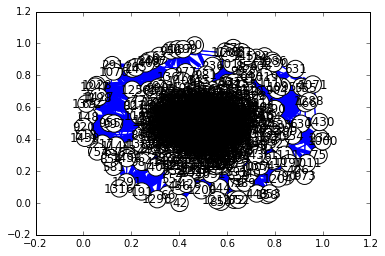

In [14]:
values = []
for node in G.nodes():
    if node in order[0:5]:
        values += 'r'
    else:
        values += 'w'
nx.draw_networkx_nodes(G,pos,node_size=300, node_color=values) 
nx.draw_networkx_edges(G,pos,edge_color='b')
nx.draw_networkx_labels(G,pos)
plt.show()

In [16]:
# top three sentences as follows

In [15]:
for node in G.nodes():
    if node in order[0:5]:
        print sentences[node] + '\n'

youve ungently brutus stole from my bed and yesternight at supper you suddenly arose and walkd about musing and sighing with your arms across and when askd you what the matter was you stared upon me with ungentle looks urged you further then you scratchd your head and too impatiently stampd with your foot yet insisted yet you answerd not but with an angry wafture of your hand gave sign for me to leave you so did fearing to strengthen that impatience which seemd too much enkindled and withal hoping it was but an effect of humour which sometime hath his hour with every man

the skies are painted with unnumberd sparks they are all fire and every one doth shine but theres but one in all doth hold his place so in the world tis furnishd well with men and men are flesh and blood and apprehensive yet in the number do know but one that unassailable holds on his rank unshaked of motion and that am he let me a little show it even in this that was constant cimber should be banishd and constant do 